In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, parent_dir)
import torch
import numpy as np
from Processing.Sample import Sample
import numpy as np
from torch.utils.data import DataLoader, TensorDataset 
import torch.nn as nn
import torch.optim as optimise
from torch.optim.lr_scheduler import StepLR
from Models.Core_CNN import Core_CNN
from Models.Core_CNN_TPL import Core_CNN_TPL
from Processing.Trainer import Trainer
import matplotlib.pyplot as plt

trainer = Trainer()

train_loader, val_loader, test_loader, train_size, val_size, test_size = trainer.load_data(1, 1000000, 2, 2, training_fold_number=0, val_fold_number=0)
train_xs = np.empty((0, 801))
train_ys = np.empty((0))
test_xs = np.empty((0, 801))
test_ys = np.empty((0))
i = 0
for xs, ys in train_loader:
    train_xs = np.concat([train_xs, xs])
    train_ys = np.concat([train_ys, ys])
    print(i)
    i += 1
    print(train_xs.shape)
    # print(ys)
for xs, ys in test_loader:
    test_xs = np.concat([test_xs, xs])
    test_ys = np.concat([test_ys, ys])



Using device: cuda
Loading data with 2 training folds and 2 testing folds
On csvm5
Loaded 90 samples
Using the specified training fold 0 and validation fold 0
Reducing to 100% of loaded data
Keeping 598834 for training
Keeping 300960 for validation
Keeping 292760 for testing
0
(598834, 801)


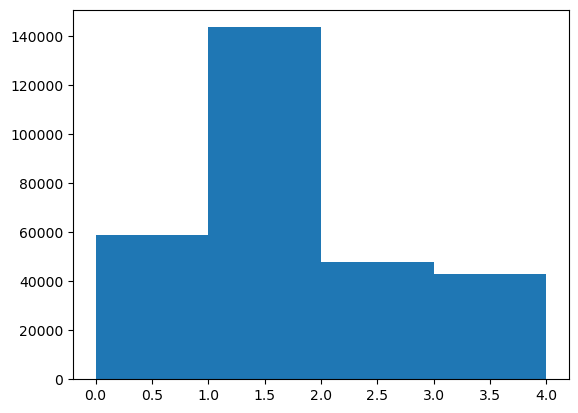

(598834,)
(292760,)


In [3]:
plt.hist(test_ys, bins = [0,1,2,3,4])
plt.show()
print(np.shape(train_ys))
print(np.shape(test_ys))

In [4]:
save_directory = "/local/scratch/Data/TROPHY/numpy/"
from Processing.Sample import Sample
import matplotlib.pyplot as plt
import numpy as np
samples = np.load(save_directory + "samples.npy", allow_pickle = True)
# coords = np.load(save_directory + "coords.npy")
data = np.load(save_directory + "data.npy")
classification = np.load(save_directory + "classification.npy")
print(samples[0].layer_range)

s0_tests = samples[0].calculate_tests(data)
print(np.shape(s0_tests[0]))
s0_answers = samples[0].calculate_answers(classification)
print(s0_answers)

[range(0, 2445), range(2446, 3348), range(3349, 4466)]
(4466, 801)
(801,)
[3 3 3 ... 3 3 3]


In [5]:
print(np.shape(data.T))
from sklearn.model_selection import StratifiedGroupKFold

groups = []
for i, sample in enumerate(samples):
    sample_size = sample.end_index - sample.start_index + 1
    indices = np.ones(sample_size) * i
    groups = np.concatenate([groups, indices])

skf = StratifiedGroupKFold(n_splits = 4)
training_indices = []
test_indices = []
match_scores = []
for split_train_indices, split_test_indices in skf.split(np.transpose(data), classification, groups):
    training_indices.append(split_train_indices)
    test_indices.append(split_test_indices)
    training_ys = classification[split_train_indices]
    testing_ys = classification[split_test_indices]

    training_hist = np.histogram(training_ys, bins = [1,2,3,4,5])[0]
    total_num_training = np.sum(training_hist)
    testing_hist = np.histogram(testing_ys, bins = [1,2,3,4,5])[0]
    total_num_testing = np.sum(testing_hist)

    prop_by_class_train = training_hist / total_num_training
    prop_by_class_test = testing_hist / total_num_testing

    match_score = np.sum(np.abs(prop_by_class_train - prop_by_class_test)**2)

    print(match_score)
    match_scores.append(match_score)

best_fold = np.argmin(match_scores)
print(best_fold)
training_indices = training_indices[best_fold]
test_indices = test_indices[best_fold]






(1192554, 801)
0.00022550667177151455
0.000370085573116741
0.0003551204065101648
0.00014064964293231423
3


1


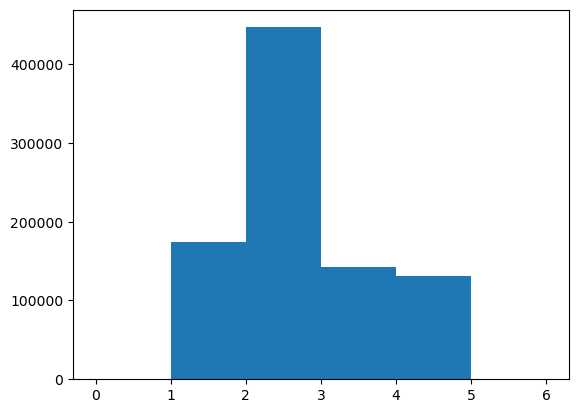

0: 0, 4467
1: 16881, 0
2: 12377, 0
3: 17003, 0
4: 5309, 0
5: 7477, 0
6: 9340, 0
7: 10535, 0
8: 11710, 0
9: 10926, 0
10: 16553, 0
11: 0, 7588
12: 3471, 0
13: 31841, 0
14: 0, 38397
15: 18305, 0
16: 34392, 0
17: 20498, 0
18: 0, 12643
19: 5833, 0
20: 9038, 0
21: 0, 10848
22: 11807, 0
23: 0, 5162
24: 11660, 0
25: 14703, 0
26: 19567, 0
27: 0, 14175
28: 39061, 0
29: 0, 3102
30: 41999, 0
31: 0, 2997
32: 7697, 0
33: 10487, 0
34: 0, 12879
35: 5887, 0
36: 6799, 0
37: 7747, 0
38: 9621, 0
39: 9539, 0
40: 0, 7738
41: 5416, 0
42: 0, 35851
43: 10762, 0
44: 3325, 0
45: 8745, 0
46: 10016, 0
47: 15025, 0
48: 7645, 0
49: 10174, 0
50: 5112, 0
51: 5706, 0
52: 6258, 0
53: 25875, 0
54: 5153, 0
55: 0, 4735
56: 20703, 0
57: 0, 18390
58: 13298, 0
59: 5917, 0
60: 5524, 0
61: 17709, 0
62: 48066, 0
63: 6337, 0
64: 6414, 0
65: 0, 10048
66: 33549, 0
67: 0, 13552
68: 0, 13543
69: 1167, 0
70: 5351, 0
71: 0, 8687
72: 0, 5683
73: 7081, 0
74: 2857, 0
75: 0, 23683
76: 19477, 0
77: 0, 39036
78: 9943, 0
79: 28337, 0
80: 0, 5

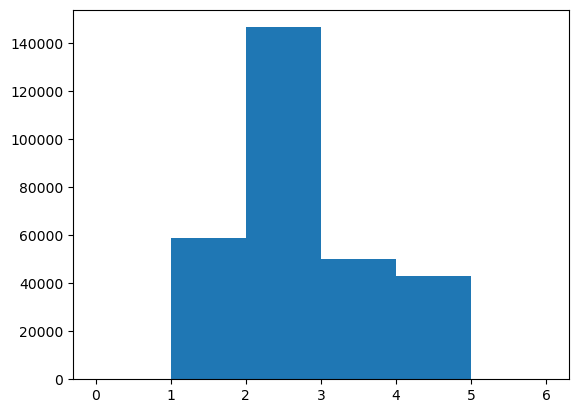

In [ ]:
index = 3
print(np.size(training_indices[0]))
training_real_ys = classification[training_indices]
plt.hist(training_real_ys, bins = [0,1,2,3,4,5,6])
plt.show()
organised_training_groups = groups[training_indices]
organised_testing_groups = groups[test_indices]
training_groups = []
testing_groups = []
for i in range(0, 90):
    print(f"{i}: {np.sum(organised_training_groups == i)}, {np.sum(organised_testing_groups == i)}")
    # print(np.sum(organised_training_groups == i))
    if np.sum(organised_training_groups == i) == 0:
        testing_groups.append(i)
    else:
        training_groups.append(i)
print(training_groups)
print(testing_groups)
print(len(training_groups))
print(len(testing_groups))
print(np.size(test_indices[0]))
testing_real_ys = classification[test_indices]
plt.hist(testing_real_ys, bins = [0,1,2,3,4,5,6])
plt.show()

